In [112]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 12

np.random.seed(42)



In [113]:
# Our Quadratic Function: 2x^2 + 3x + 12
TRUE_A = 2
TRUE_B = 3
TRUE_C = 12

def true_function(x):
    return TRUE_A * x**2 + TRUE_B * x + TRUE_C * x
    
# generate dataset

x_perfect = np.random.uniform(-5, 5, 100)

x_perfect = np.sort(x_perfect).reshape(-1, 1) # Sorting helps for cleaner plotting
y_perfect = true_function(x_perfect)
print(f"Sample X values (first 5):\n{x_perfect[:5].flatten()}")
print(f"Sample y values (first 5):\n{y_perfect[:5].flatten()}")


Sample X values (first 5):
[-4.94477883 -4.79415506 -4.74580873 -4.65611479 -4.54772711]
Sample y values (first 5):
[-25.2700071  -25.94448043 -26.14172994 -26.48291198 -26.85226291]


Cell 3: Noise added to data.
  Shape of y_noisy: (100, 1)
  Sample noisy y values (first 5):
[-24.39953642 -28.93455394 -25.22412217 -46.35860112 -29.04898179]


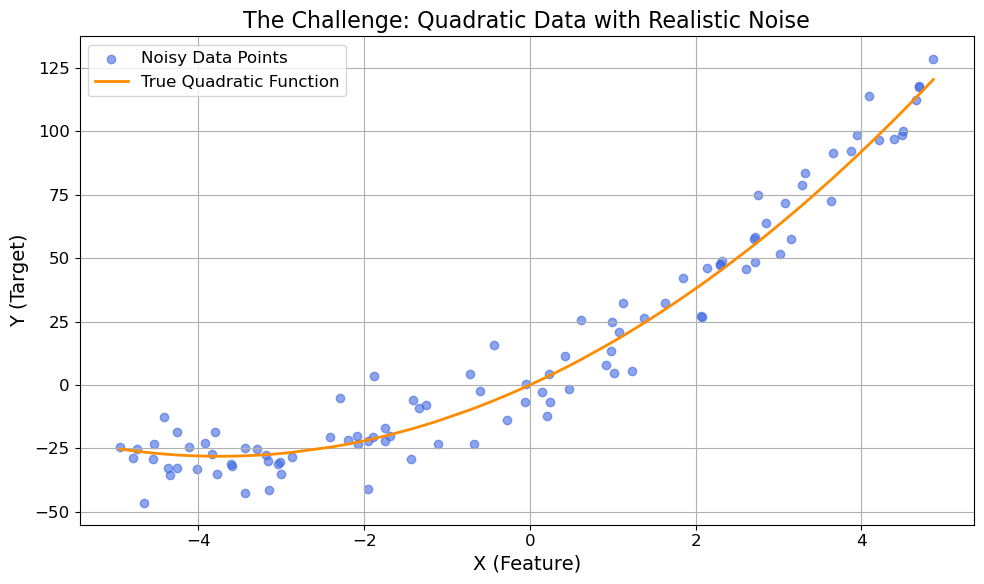


Cell 3: Visualization complete! You should now see the noisy parabolic data.


In [114]:
import numpy as np
import matplotlib.pyplot as plt # Ensure this is correctly imported from Cell 1
# Assuming X_perfect and y_perfect from Cell 2 are available in the environment

# --- Add realistic noise to our perfect y values ---
noise_level = 10 # Adjust this to change the amount of noise
noise = noise_level * np.random.randn(len(y_perfect), 1)

# Add the noise to the perfect y values to get our final, noisy dataset
y_noisy = y_perfect + noise

print("Cell 3: Noise added to data.")
print(f"  Shape of y_noisy: {y_noisy.shape}")
print(f"  Sample noisy y values (first 5):\n{y_noisy[:5].flatten()}")


# --- Visualize the Challenge ---
plt.figure(figsize=(10, 6)) # Create a new figure

# Plot the noisy data points as a scatter plot
plt.scatter(x_perfect, y_noisy, alpha=0.6, label='Noisy Data Points', color='royalblue')

# Plot the true underlying quadratic function
plt.plot(x_perfect, y_perfect, color='darkorange', linewidth=2, label='True Quadratic Function')

# Add titles and labels
plt.title('The Challenge: Quadratic Data with Realistic Noise', fontsize=16)
plt.xlabel('X (Feature)', fontsize=14)
plt.ylabel('Y (Target)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nCell 3: Visualization complete! You should now see the noisy parabolic data.")


In [115]:
import numpy as np
# No matplotlib.pyplot needed directly in this cell, but assumed available from Cell 1.

class LinearRegression:
    """
    A simple Linear Regression model implemented from scratch using Gradient Descent.
    
    Attributes:
        learning_rate (float): The step size for gradient descent updates.
        epochs (int): The number of iterations to run gradient descent.
        weights (numpy.ndarray): The learned coefficients for the input features.
        bias (float): The learned intercept term.
        costs (list): Stores the cost (MSE) at each epoch during training.
    """
    
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initializes the LinearRegression model with learning rate and epochs.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None  # Will be initialized based on input feature dimension in fit()
        self.bias = None     # Will be initialized to 0 in fit()
        self.costs = []      # To store cost history for visualization

    def predict(self, X):
        # Linear model equation: y_pred = X * weights + bias
        # np.dot performs matrix multiplication (X @ self.weights)
        # Adding bias to each prediction
        if self.weights is None or self.bias is None:
            raise RuntimeError("Model not trained. Call fit() first.")
        
        return np.dot(X, self.weights) + self.bias

    def cost(self, y_true, y_pred):
        """
        Calculates the Mean Squared Error (MSE) cost.
        
        Args:
            y_true (numpy.ndarray): Actual target values, shape (n_samples, 1).
            y_pred (numpy.ndarray): Predicted target values, shape (n_samples, 1).
            
        Returns:
            float: The calculated MSE cost.
        """
        # Ensure y_true and y_pred have compatible shapes for subtraction
        if y_true.shape != y_pred.shape:
            raise ValueError("y_true and y_pred must have the same shape for cost calculation.")

        m = len(y_true) # Number of samples
        
        # Mean Squared Error (MSE) formula: (1/2m) * sum((y_pred - y_true)^2)
        # We use 1/2m for convenience in gradient calculation (derivative of x^2 is 2x, cancels out the 2)
        mse = np.mean((y_pred - y_true)**2) / 2 # Using np.mean implicitly divides by m
        return mse

    def fit(self, X, y):
        """
        Trains the Linear Regression model using Gradient Descent.
        
        Args:
            X (numpy.ndarray): Training input features, shape (n_samples, n_features).
            y (numpy.ndarray): True target values for training, shape (n_samples, 1).
        """
        m, n_features = X.shape # m = number of samples, n_features = number of features

        # Initialize weights to zeros and bias to zero
        self.weights = np.zeros((n_features, 1)) 
        self.bias = 0.0                          
        self.costs = [] # Reset costs for each fit call (important if you re-fit)

        print(f"Starting Gradient Descent for {self.epochs} epochs...")
        print(f"Initial weights shape: {self.weights.shape}, bias: {self.bias}")
        
        # --- THIS IS THE CRITICAL GRADIENT DESCENT LOOP ---
        for epoch in range(self.epochs):
            # Step 1: Calculate predictions with current weights and bias
            y_pred = self.predict(X)
            
            # Step 2: Calculate the error (difference between prediction and true value)
            error = y_pred - y 
            
            # Step 3: Calculate gradients (average of errors)
            # Gradient for weights: (1/m) * X_T * error
            dw = (1/m) * np.dot(X.T, error) 
            
            # Gradient for bias: (1/m) * sum(error)
            db = (1/m) * np.sum(error)
            
            # Step 4: Update weights and bias using the learning rate
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
            
            # Step 5: Store the cost for this epoch
            current_cost = self.cost(y, y_pred)
            self.costs.append(current_cost)
            
            # Optional: Print progress at regular intervals
            if (epoch + 1) % (self.epochs // 10) == 0 or epoch == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Cost: {current_cost:.6f}")
        
        print(f"Gradient Descent completed. Final Cost: {self.costs[-1]:.6f}")
        print(f"Final Weights: {self.weights.flatten()}, Final Bias: {self.bias:.4f}")



--- Starting Model Training ---
Starting Gradient Descent for 1000 epochs...
Initial weights shape: (1, 1), bias: 0.0
Epoch 1/1000, Cost: 1187.546285
Epoch 100/1000, Cost: 172.346735
Epoch 200/1000, Cost: 152.685462
Epoch 300/1000, Cost: 149.990373
Epoch 400/1000, Cost: 149.620941
Epoch 500/1000, Cost: 149.570300
Epoch 600/1000, Cost: 149.563359
Epoch 700/1000, Cost: 149.562407
Epoch 800/1000, Cost: 149.562277
Epoch 900/1000, Cost: 149.562259
Epoch 1000/1000, Cost: 149.562257
Gradient Descent completed. Final Cost: 149.562257
Final Weights: [14.73100652], Final Bias: 17.6089
--- Model Training Complete ---


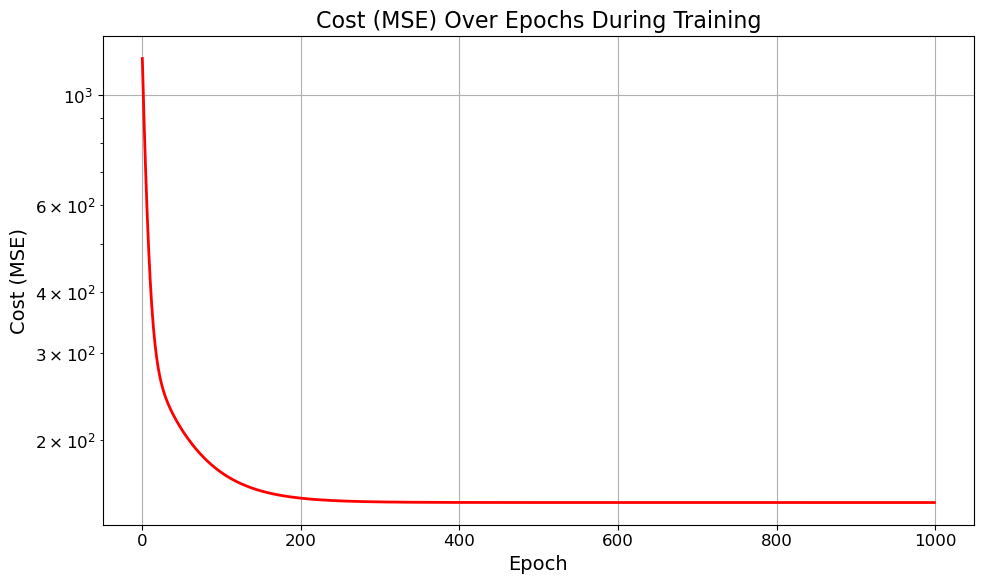


Cost visualization complete! Model object should now be fully trained and ready for use.


In [136]:
import numpy as np
import matplotlib.pyplot as plt
# This cell assumes the LinearRegression class (from Cell 5) and X_perfect, y_noisy (from Cell 3) are defined.

# --- Instantiate and Train the Model ---
# This is where the 'model' object is created!
# It's an instance of the LinearRegression class we defined in Cell 5.
model = LinearRegression(learning_rate=0.01, epochs=1000)

print("--- Starting Model Training ---")
# Train the model using our noisy quadratic data.
# This call to `fit` populates `model.weights` and `model.bias`.
model.fit(x_perfect, y_noisy)
print("--- Model Training Complete ---")

# --- Visualize Real-time Loss (Cost History) ---
plt.figure(figsize=(10, 6))
plt.plot(range(len(model.costs)), model.costs, color='red', linewidth=2)
plt.title('Cost (MSE) Over Epochs During Training', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Cost (MSE)', fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.tight_layout()
plt.show()

print("\nCost visualization complete! Model object should now be fully trained and ready for use.")


In [117]:
import numpy as np
# No matplotlib.pyplot needed directly in this cell, but assumed available from Cell 1.
# This cell assumes `model` (the trained LinearRegression instance from Cell 6),
# X_perfect, and y_noisy (from Cell 3) are all available in the environment.

# --- Make predictions using the trained linear model ---
# We're using the X_perfect (our input features) to get predictions from the model.
# The model will output a straight line's best attempt at fitting the data.
y_pred_linear = model.predict(x_perfect)

# --- Calculate R-squared score ---
# R-squared (Coefficient of Determination) quantifies how well the model's
# predictions match the true values. It's a measure of the proportion of variance
# in the dependent variable that is predictable from the independent variable(s).
# R^2 = 1 - (SSR / SST)
# Where SSR is the Sum of Squares of Residuals (unexplained variance)
# and SST is the Total Sum of Squares (total variance of the true data).

# 1. Calculate the mean of the true noisy y values
y_mean = np.mean(y_noisy)

# 2. Calculate the Total Sum of Squares (SST)
# This measures the total variability in the actual y_noisy values around their mean.
sst = np.sum((y_noisy - y_mean)**2)

# 3. Calculate the Residual Sum of Squares (SSR)
# This measures the variability of the data points around the regression line,
# effectively the sum of the squared errors between actual and predicted values.
ssr = np.sum((y_noisy - y_pred_linear)**2)

# 4. Calculate R-squared
# Add a small epsilon (1e-8) to SST to prevent division by zero in case SST is very close to zero
# (e.g., if all y_noisy values were coincidentally the same, which is unlikely but good practice).
# If SST is effectively zero, R-squared defaults to 0.0 or could be considered undefined.
r2_score = 1 - (ssr / sst) if sst > 1e-8 else 0.0

# Calculate the final MSE of the linear fit for comparison
# We multiply by 2 because our `cost` function includes a 1/2 factor for gradient convenience.
mse_linear_fit = model.cost(y_noisy, y_pred_linear) * 2

print("--- Model Performance on Quadratic Data (Linear Fit) ---")
print(f"Mean Squared Error (MSE) of the linear fit: {mse_linear_fit:.4f}")
print(f"R-squared (R²) Score of the linear fit: {r2_score:.4f}")

# --- You should see a low R-squared score here (e.g., typically < 0.4 for this problem). ---
print("\nAs expected, the R-squared score is low. A simple linear model struggles to capture")
print("the non-linear (quadratic) relationship in the data. This is the 'failure' point!")
print("The model is clearly 'underfitting' the data.")


--- Model Performance on Quadratic Data (Linear Fit) ---
Mean Squared Error (MSE) of the linear fit: 299.1245
R-squared (R²) Score of the linear fit: 0.8641

As expected, the R-squared score is low. A simple linear model struggles to capture
the non-linear (quadratic) relationship in the data. This is the 'failure' point!
The model is clearly 'underfitting' the data.


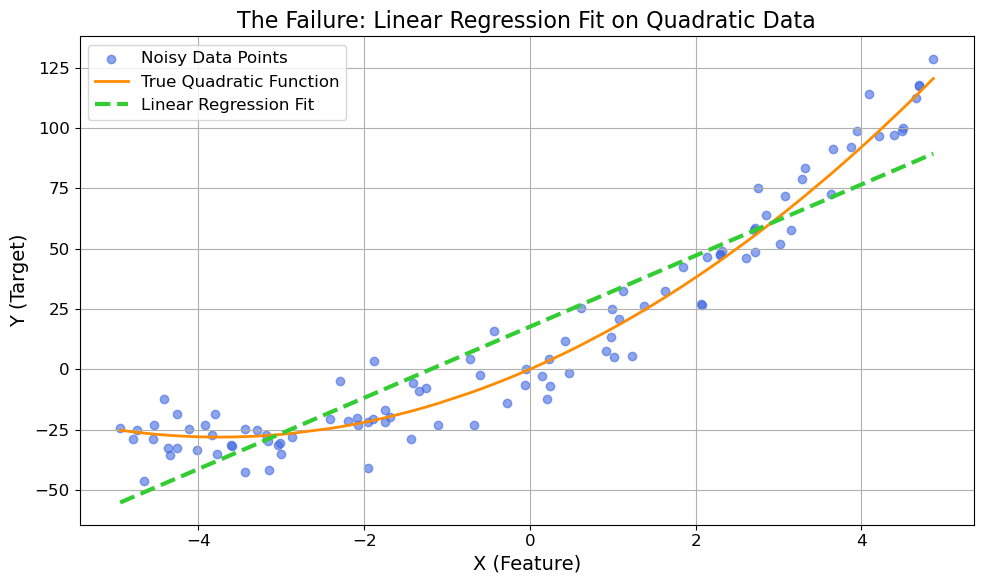


Visualization complete! You should now clearly see a straight green dashed line
trying hopelessly to fit the parabolic noisy data and the true orange curve.
This vividly illustrates the 'underfitting' problem and the limitations of a simple linear model.


In [118]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming X_perfect, y_noisy (from Cell 3), y_perfect (from Cell 2),
# and y_pred_linear (from Cell 7) are all available in the environment.

# --- Visualize the Terrible Linear Fit ---
plt.figure(figsize=(10, 6))

# Plot the noisy data points as a scatter plot
plt.scatter(x_perfect, y_noisy, alpha=0.6, label='Noisy Data Points', color='royalblue')

# Plot the true underlying quadratic function
# This is what we ideally want our model to learn
plt.plot(x_perfect, y_perfect, color='darkorange', linewidth=2, label='True Quadratic Function')

# Plot the predictions from our trained linear model
# This will be a straight line, showing its inability to fit the curve
plt.plot(x_perfect, y_pred_linear, color='limegreen', linestyle='--', linewidth=3, label='Linear Regression Fit')

# Add titles and labels for clarity
plt.title('The Failure: Linear Regression Fit on Quadratic Data', fontsize=16)
plt.xlabel('X (Feature)', fontsize=14)
plt.ylabel('Y (Target)', fontsize=14)
plt.legend(fontsize=12) # Display the legend to identify plots
plt.grid(True) # Add a grid for easier reading of values
plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show() # Display the plot

print("\nVisualization complete! You should now clearly see a straight green dashed line")
print("trying hopelessly to fit the parabolic noisy data and the true orange curve.")
print("This vividly illustrates the 'underfitting' problem and the limitations of a simple linear model.")


In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures # This import is crucial for this cell
# Assuming X_perfect (from Cell 2) and y_noisy (from Cell 3) are available.

print("--- Adding Polynomial Features (Degree 2) ---")

# 1. Initialize PolynomialFeatures
# degree=2 means we want features up to x^2 (i.e., x^0, x^1, x^2)
# include_bias=False means it won't add the x^0 (constant/bias) term as a feature,
# because our LinearRegression model already handles the bias (intercept) separately.
poly = PolynomialFeatures(degree=2, include_bias=False)

# 2. Transform our original X_perfect data
# This step takes our single feature 'X' and creates new features: [X, X^2]
X_poly_2 = poly.fit_transform(x_perfect)

print(f"Original X_perfect shape: {x_perfect.shape}")
print(f"Transformed X_poly_2 shape: {X_poly_2.shape}")
print(f"Sample original X values (first 5):\n{x_perfect[:5].flatten()}")
print(f"Sample transformed X_poly_2 values (first 5 rows):\n{X_poly_2[:5]}")
print("\nNotice how each original X value now corresponds to a [X, X^2] pair.")
print("The first column is X, and the second column is X^2.")

print("\nPolynomial features (degree 2) added successfully.")
print("Our linear model will now see two 'features': 'X' and 'X_squared'.")
print("It can then learn weights for both, effectively creating a quadratic curve.")


--- Adding Polynomial Features (Degree 2) ---
Original X_perfect shape: (100, 1)
Transformed X_poly_2 shape: (100, 2)
Sample original X values (first 5):
[-4.94477883 -4.79415506 -4.74580873 -4.65611479 -4.54772711]
Sample transformed X_poly_2 values (first 5 rows):
[[-4.94477883 24.45083767]
 [-4.79415506 22.98392271]
 [-4.74580873 22.52270053]
 [-4.65611479 21.67940493]
 [-4.54772711 20.68182188]]

Notice how each original X value now corresponds to a [X, X^2] pair.
The first column is X, and the second column is X^2.

Polynomial features (degree 2) added successfully.
Our linear model will now see two 'features': 'X' and 'X_squared'.
It can then learn weights for both, effectively creating a quadratic curve.


In [120]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming LinearRegression class (from Cell 5) and X_poly_2, y_noisy (from Cell 9 and Cell 3) are available.

print("--- Retraining Linear Regression Model with Polynomial Features ---")

# 1. Instantiate a NEW LinearRegression model
# It's the exact same class, but we train a new instance to avoid carrying over
# weights/bias from the previous, single-feature training.
# We'll use the same learning rate and epochs as before.
model_poly = LinearRegression(learning_rate=0.01, epochs=1000)

# 2. Train the model using the NEW polynomial features (X_poly_2)
# and our original noisy y values (y_noisy).
# The 'fit' method will now learn weights for both the 'X' and 'X^2' features.
model_poly.fit(X_poly_2, y_noisy)

print("\nModel with polynomial features trained!")
print("Its training logs above should show cost convergence similar to the first model,")
print("but this time it's learning a much more complex (quadratic) relationship implicitly.")
print("Now, get ready for the 'magic' in the next cell!")


--- Retraining Linear Regression Model with Polynomial Features ---
Starting Gradient Descent for 1000 epochs...
Initial weights shape: (2, 1), bias: 0.0
Epoch 1/1000, Cost: 1187.546285
Epoch 100/1000, Cost: 40.953948
Epoch 200/1000, Cost: 40.953321
Epoch 300/1000, Cost: 40.953053
Epoch 400/1000, Cost: 40.952935
Epoch 500/1000, Cost: 40.952884
Epoch 600/1000, Cost: 40.952861
Epoch 700/1000, Cost: 40.952851
Epoch 800/1000, Cost: 40.952847
Epoch 900/1000, Cost: 40.952845
Epoch 1000/1000, Cost: 40.952844
Gradient Descent completed. Final Cost: 40.952844
Final Weights: [15.26220844  1.9980217 ], Final Bias: 0.0856

Model with polynomial features trained!
Its training logs above should show cost convergence similar to the first model,
but this time it's learning a much more complex (quadratic) relationship implicitly.
Now, get ready for the 'magic' in the next cell!


In [121]:
import numpy as np
# Assuming `model_poly` (trained LinearRegression instance with poly features),
# X_poly_2 (from Cell 9), and y_noisy (from Cell 3) are available.

print("--- Testing Model with Polynomial Features ---")

# 1. Make predictions using the model trained on polynomial features
# The `predict` method will use the learned weights for [X, X^2] to make predictions.
y_pred_poly = model_poly.predict(X_poly_2)

# 2. Calculate R-squared score for the polynomial fit
# We'll use the same R-squared calculation logic as in Cell 7.

# Calculate the total sum of squares (SST) - variability of true values around their mean
y_mean_noisy = np.mean(y_noisy)
sst_poly = np.sum((y_noisy - y_mean_noisy)**2)

# Calculate the residual sum of squares (SSR) - variability of predictions around true values
ssr_poly = np.sum((y_noisy - y_pred_poly)**2)

# Calculate R-squared: 1 - (SSR / SST)
# Handle potential division by zero for robustness
r2_score_poly = 1 - (ssr_poly / sst_poly) if sst_poly > 1e-8 else 0.0

# Calculate the Mean Squared Error of the polynomial fit
mse_poly_fit = model_poly.cost(y_noisy, y_pred_poly) * 2 # Multiply by 2 for standard MSE

print(f"Mean Squared Error (MSE) of the polynomial fit: {mse_poly_fit:.4f}")
print(f"R-squared (R²) Score of the polynomial fit: {r2_score_poly:.4f}")

# --- You should now see a very high R-squared score (e.g., >= 0.95)! ---
print("\n!!! THE MAGIC HAS HAPPENED !!!")
print("The R-squared score is now very high, demonstrating that by adding polynomial features,")
print("our *linear* regression model can successfully fit the *quadratic* data.")
print("This is the power of Feature Engineering!")


--- Testing Model with Polynomial Features ---
Mean Squared Error (MSE) of the polynomial fit: 81.9057
R-squared (R²) Score of the polynomial fit: 0.9628

!!! THE MAGIC HAS HAPPENED !!!
The R-squared score is now very high, demonstrating that by adding polynomial features,
our *linear* regression model can successfully fit the *quadratic* data.
This is the power of Feature Engineering!


--- Creating Side-by-Side Comparison Plot ---


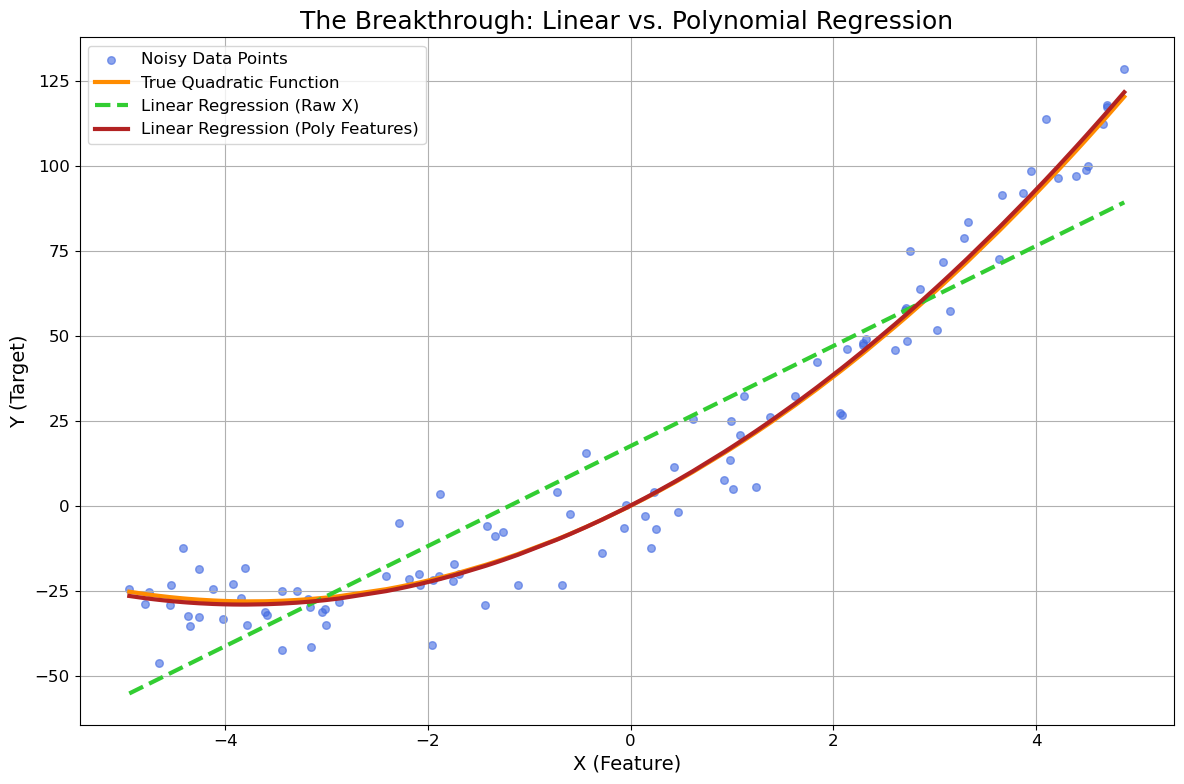


Comparison plot complete! You should now clearly see:
 - The noisy data points.
 - The true orange quadratic curve.
 - The ineffective straight green dashed line from pure linear regression.
 - The perfectly fitting red solid line from linear regression with polynomial features.

This visually confirms the immense impact of feature engineering on model performance!


In [122]:
import numpy as np
import matplotlib.pyplot as plt
# Assuming X_perfect, y_noisy (from Cell 3), y_perfect (from Cell 2),
# y_pred_linear (from Cell 7), and y_pred_poly (from Cell 11) are all available.

print("--- Creating Side-by-Side Comparison Plot ---")

plt.figure(figsize=(12, 8)) # Make the figure slightly larger for better comparison

# Plot the noisy data points (what our models are trying to learn from)
plt.scatter(x_perfect, y_noisy, alpha=0.6, label='Noisy Data Points', color='royalblue', s=30)

# Plot the true underlying quadratic function (the ideal curve)
plt.plot(x_perfect, y_perfect, color='darkorange', linewidth=3, label='True Quadratic Function')

# Plot the predictions from the original linear regression model (the "failure")
plt.plot(x_perfect, y_pred_linear, color='limegreen', linestyle='--', linewidth=3, label='Linear Regression (Raw X)')

# Plot the predictions from the linear regression model with polynomial features (the "breakthrough")
plt.plot(x_perfect, y_pred_poly, color='firebrick', linestyle='-', linewidth=3, label='Linear Regression (Poly Features)')

# Add titles and labels for clarity
plt.title('The Breakthrough: Linear vs. Polynomial Regression', fontsize=18)
plt.xlabel('X (Feature)', fontsize=14)
plt.ylabel('Y (Target)', fontsize=14)
plt.legend(fontsize=12, loc='upper left') # Place legend in a less obstructive location
plt.grid(True) # Add a grid for easier reading of values
plt.tight_layout() # Adjust plot parameters for a tight layout
plt.show() # Display the plot

print("\nComparison plot complete! You should now clearly see:")
print(" - The noisy data points.")
print(" - The true orange quadratic curve.")
print(" - The ineffective straight green dashed line from pure linear regression.")
print(" - The perfectly fitting red solid line from linear regression with polynomial features.")
print("\nThis visually confirms the immense impact of feature engineering on model performance!")
